# CE888 Assignment 2 for Demo

This code is written to demonstarte data analysis made for ce888 assignment 2.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 29 March 2019<br> 
**Last modified on**: 16 April 2019<br> 

In [2]:
# import open source libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys

# import original libraries
sys.path.append("../")

#import utility as UTL
import assignment2_main as MAIN2
from conf import myVariables as VAR
import load_data as DATA
import preprocess as PREP
import autoencoder as AE



import histogram as HST
import correlation as CRRL
import pca as PCA
import classifier as CLS
import feature_importance as IMP

## 1. Prepare the data
Load data from **data** directory.<br>

### 1-1. Select the data to load
> 0. Human Activity
1. Spam
2. Phishing
>

In [4]:
data_list={0: "human activity", 1: "spam", 2: "phishing"}
data_id=int(input(data_list))

col_names, features_df, targets_df, data_df, pic_file=DATA.load_data(data_id=data_id)
unique_labels=DATA.verify_data(data_df, targets_df, dispaly_range=False)

{0: 'human activity', 1: 'spam', 2: 'phishing'}0


./sub/load_data.py:52: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data_df = data_df.convert_objects(convert_numeric=True)


Number of NaN: 0
Data shape:  (7352, 562)
Target labels: ['1' '2' '3' '4' '5' '6']
Class distribution: ['0.17', '0.15', '0.13', '0.17', '0.19', '0.19']


### 1-2. Obtain the small data

In [5]:
features, classes=PREP.get_small_data(features_df, targets_df)

Enter the number of samples to use (Total: 7352): 
 - Number of features: 561
 - Minimul data size : 4538
 - Specified size    : 4538



### 1-3. Pre-process the data
Fit the scaler and transform the data.<br>
When the scaler ID is not specified, MinMaxScaler will be applied.

In [6]:
scl, features_nrm=PREP.pre_processing(features, display_result=False)

Select the scaler 0 (None), 1 (MinMax), 2 (Quantile), 3 (Standard): 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Scaler: MinMaxScaler(copy=True, feature_range=(0, 1))


### 1-4. Split the data

In [12]:
X, y=features_nrm, classes
X_tr, X_te, y_tr, y_te=PREP.split_data(features_nrm, classes)

Enter the test_size (0<=test_size<1): 
Training: 3630, Test: 908



## 4. Build an Autoencoder
### 4-1. Define the parameters
- `num_outs`: number of outputs
- `act_funcs`:activation functions
- `opt`:optimiser
- `loss`: loss function
- `tr_epoch`: training epoch
- `ver`: verbose

In [10]:
layers, mode, act, opt, loss, dropout, \
    epochs, verbose, summary_display=AE.get_parameters(data_id)

Using TensorFlow backend.


Define the parameters for the autoencoder.
When skipped (push enter) or an invalid value is given, the default value will be used.
[Parameter 1/9: Autoencoder type] 0:Normal or 1:Stacked (default=0): 
[Parameter 2/9: Number of neurons in each layer] Integer separated by comma (default=55,30,10): 
[Parameter 3/9: Activation function] 0:relu 1:sigmoid 2:tanh 3:softmax (default=relu): 
[Parameter 4/9: Optimiser function] 0:adam or 1:sdg (default=0): 
 - Learning rate (default=0.010000): 
[Parameter 5/9: Loss function] 0:mse 1:mean_absolute_error 2:mean_squared_logarithmic_error (default=mse): 
[Parameter 6/9: Dropout rate] 0<=rate<1 (default=0.000000): 
[Parameter 7/9: Training epochs] (default=20): 
[Parameter 8/9: Verbose] 0:None or 1:Display (default=1): 
[Parameter 9/9: Summary display] 0:False or 1:True (default=1): 
Parameters for the autoencoders are
 1. Mode: 0(Normal)
 2. Layers: [55, 30, 10]
 3. Activation function: relu
 4. Optimiser: <keras.optimizers.Adam object at 0x126fd47f

### 4-2. Train the autoencoder

In [16]:
encode, histories=AE.autoencoder(X, layers=layers, mode=mode, act=act, opt=opt, 
                                 loss=loss, dropout=dropout, epochs=epochs, 
                                 verbose=verbose, summary_display=summary_display)

num_outs: [561, 561, 55, 30, 10] [10, 30, 55, 561, 561]
i= 0 | output= 561 , input= 561
i= 1 | output= 55 , input= 561
i= 2 | output= 30 , input= 55
i= 3 | output= 10 , input= 30
i= 0 | output= 30 , input= 10
i= 1 | output= 55 , input= 30
i= 2 | output= 561 , input= 55
i= 3 | output= 561 , input= 561
Epoch 1/20
4538/4538 [==============================] - 2s - loss: 1466.2014     
Epoch 2/20
4538/4538 [==============================] - 2s - loss: 0.1262     
Epoch 3/20
4538/4538 [==============================] - 2s - loss: 0.1262     
Epoch 4/20
4538/4538 [==============================] - 2s - loss: 0.1262     
Epoch 5/20
4538/4538 [==============================] - 2s - loss: 0.1262     
Epoch 6/20
4538/4538 [==============================] - 2s - loss: 0.1262     
Epoch 7/20
4538/4538 [==============================] - 2s - loss: 0.1262     
Epoch 8/20
4538/4538 [==============================] - 2s - loss: 0.1262     
Epoch 9/20
4538/4538 [==============================] - 2s - lo

### 4-3. Display the training loss history

Save training loss history? (y/n): n


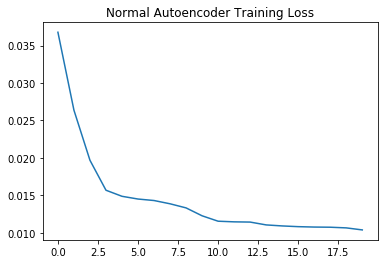

In [14]:
AE.plot_ae_loss_history(histories, mode, pic_file)

### 4-4. Extract features from the datasets

In [15]:
feat_compressed=encoder.predict(features_nrm)
X_tr_compressed=encoder.predict(X_tr)
X_tr_compressed=encoder.predict(X_te)

print("The number of compressed features:", len(feat_compressed[0]))

NameError: name 'encoder' is not defined

## 5. Build a discriminative neural network
### 5-1. Keras Multiclass classifier
This model is developed in reference to [Multi-Class Classification Tutorial with the Keras Deep Learning Library ](https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/).

In [ ]:
hidden_act='relu'
out_act='softmax'
cls_optimizer="adam"
cls_loss='categorical_crossentropy'

In [ ]:
def classifier(num_out=1, finetune=False):
    from keras.models import Sequential
    from keras.layers import Dense, Input

    model=Sequential()
    for e in encoder.layers:
        e.trainable=finetune
        model.add(e)
    model.add(Dense(30, input_dim=num_outs[-1], activation=hidden_act))
    model.add(Dense(num_out, activation=out_act))

    model.compile(loss=cls_loss, optimizer=cls_optimizer, metrics=['accuracy'])    
    
    return model

In [ ]:
mlp=classifier(num_out=len(unique_labels), finetune=True)
mlp.summary()

In [ ]:
def multi_class(Y):
    # For multi class task, replace the target with dummy values
    from keras.utils import np_utils
    from sklearn.preprocessing import LabelEncoder

    # encode class values as integers
    label_encoder=LabelEncoder()
    encoded_Y=label_encoder.fit_transform(Y)

    # convert integers to dummy variables (i.e. one hot encoded)
    encoded_Y=np_utils.to_categorical(encoded_Y)

    return encoded_Y

Y_tr=multi_class(Y_tr)

In [ ]:
# Train the network
loss_hiss=mlp.fit(X_tr, Y_tr, epochs=20, validation_split=0.2, verbose=1)

In [ ]:
def plot_mlp_loss_history(histories, pic_file):
    import matplotlib.ticker as ticker
    
    fig=plt.figure(figsize=(15,5))

    metrics=[["loss", "val_loss"], ["acc", "val_acc"]]
    labels=["Loss", "Accuracy"]
    for i, m , l in zip(range(1,3), metrics, labels):
        plt.subplot(1, 2, i)
        plt.plot(histories.history[m[0]], label="training")
        plt.plot(histories.history[m[1]], label="validation")
        plt.title("MLP Training and Validation %s" % l)
        plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
        plt.legend()

    plt.show ()
    
    fig.savefig("%s%s_ae_loss.png" % (VAR.out_path, pic_file), \
                bbox_inches='tight')

In [ ]:
pic_file="test_mlp"
plot_mlp_loss_history(loss_hiss, pic_file)

### 5-2. Sklearn Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

classifier=MLPClassifier(activation = "tanh", alpha = 1, hidden_layer_sizes = (14,), 
                   max_iter = 8000, learning_rate_init = 0.00001, 
                    solver = "lbfgs")

### (1) Grid Search
The codes and markdown below are originally written by the author for the assignment for CE802 which was submitted to the CSEE Department on 16 January 2019.<br><br>
Major parameters to be tuned are:


|parameter               |default    |description                                              |
|------------------------|-----------|---------------------------------------------------------|
|hidden_layer_sizes      |(100,)     |i-th element: numb of neurons in the i-th hidden layer   |
|activation              |"relu"     |activation function                                      |
|solver                  |"adam"     |weight optimasation                                      |
|alpha                   |0.0001     |regularization parameter                                 |
|learning_rate_init      |0.001      |step-size in weights update (solver=’sgd’ or ‘adam’)     |
|max_iter                |200        |max num of iterations                                    |
|momentum                |0.9        |momentum for gradient descent update (range (0, 1), solver=’sgd’|

In [ ]:
from sklearn.model_selection import \
    GridSearchCV, cross_val_score, KFold, ShuffleSplit
from statistics import mode

Hs=[(100,), (14, ), (28, ), (42, ), (56, )]
ACTs=["identity", "logistic", "tanh", "relu"]
SLOs=["lbfgs", "sgd", "adam"]
ACTs=["identity"]
SLOs=["lbfgs"]
ALPHAs=np.logspace(-5, 1, 7)
ITRs=np.linspace(6000, 10000, 5, dtype = int)
ETAs=np.logspace(-5, -3, 3)

grid_list=[]
grid_list.append(dict(activation=ACTs, solver=SLOs))
grid_list.append(dict(learning_rate_init=ETAs, alpha=ALPHAs))
grid_list.append(dict(max_iter=ITRs, hidden_layer_sizes=Hs))

grid={0:"Activation function & Solver\n", 1:"Learning rate & Momentam\n", 2:"Max iteration & Hidden layer\n"}
ans=int(input(grid))

param_grid=grid_list[ans]

print (param_grid)

In [ ]:
clf=GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1,
                    cv=ShuffleSplit())
clf

In [ ]:
def grid_search(X, y):
    score, bests, lbs, means, modes=[], [], [], [], []
    n_splits=10
    k_fold=KFold(n_splits=n_splits)

    grd = 1
    for tr, te in k_fold.split(X):
        print ("\rProgress [%s%s]" % 
               (grd * "# ", (n_splits-grd) * ". "), end = "")
        grd += 1
        best = []

        clf.fit (X[tr], y[tr])
        score.append (clf.score(X[te], y[te]))

        for key in param_grid.keys():
            method = getattr(clf.best_estimator_, key)
            best.append (method)
            if len (lbs) != len(param_grid): lbs.append("Best %s" % key)
        best.append (score[-1])
        bests.append (best)

    lbs.append ("Fold Accuracy")

    # append mean and mode
    for k in range (len (bests[0])):
        avgs = (np.array (bests)[:, k]).tolist()
        try:    modes.append (mode (avgs))
        except: modes.append ("N/A")

        try:    means.append (np.mean ([float (avg) for avg in avgs]))
        except: means.append ("N/A")

    index=["Fold-%2d" % fold for fold in(range(1, grd))]
    for add1, add2 in zip ([["---"] * (len (param_grid) + 1), means, modes], 
                           ["---", "mean", "modes"]):
        bests.append (add1)
        index.append (add2)
    
    return bests, index, lbs
        
bests, index, lbs=grid_search(X=feat_compressed, y=classes)

In [ ]:
bests

In [ ]:
index

In [ ]:
# display best scores
print ("\n")
d = pd.DataFrame(bests, index=index, columns=lbs)
print (d)

# export the results to a file
from datetime import datetime
now = datetime.now().strftime("%Y%m%d_%H%M%S")
mystr = input (">>> Enter the type of predictor (for file name): ")
d.to_csv("GridSearch_%s_%s.csv" % (mystr, now), header = lbs, 
          index = index, sep = ",", mode = "a")
print ("[  O K  ] The result of Grid Search is exported to "
       "<GridSearch_%s_%s.csv>." % (mystr, now))

### (2) Train the network

In [ ]:
classifier.fit(X_tr, Y_tr) 

### (3) Prediction and Evaluation

In [ ]:
pred=classifier.predict(X_te)

# for multi class tasks, decode the class attribute
pred_df=pd.DataFrame(pred, columns=unique_labels)
pred=pred_df.idxmax(axis=1)

## 6. Evaluation
### 6-1. Cross Validation

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

estimator=KerasClassifier(build_fn=classifier, num_out=num_out, finetune=False, epochs=100, verbose=0)
scores=cross_val_score(estimator, X, y, cv=5)#, n_jobs=-1)

In [ ]:
print("Accuracy (95%% confidence interval): %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

### 6-2. Various evaluation metrics on test data

In [ ]:
from sklearn import metrics
import pandas as pd

print ("\n< Classification Report >")
print (metrics.classification_report (cls_te, pred, digits = 5))

print ("\n< Confusion Matrix >")
print (pd.DataFrame (metrics.confusion_matrix(cls_te, pred)))
print ("Accuracy: %f" % metrics.accuracy_score (cls_te, pred))

print ("\n< Kappa Statistic >")
print (metrics.cohen_kappa_score (cls_te, pred))

CLS.plot_confusion_matrix(cls_te, pred, unique_labels, "test", "NN", "NN")

### 2-4. Classification with other procedures

#### (1) Decision Tree

In [ ]:
title = "%s_Decision_Tree (%d)" % (pic_file, len(X))
true_label, pred_label, clf = CLS.train (feat_te_compressed, cls_te, 0, 0)
#CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Decision_Tree")
clf

#### (2) Naive Bayes

In [ ]:
title = "%s_Naive Bayes (%d)" % (pic_file, len(X))
true_label, pred_label, clf = CLS.train (feat_te_compressed, cls_te, 1, 0)
#CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Naive Bayes")
clf

#### (3) SVM

In [ ]:
title = "%s_SVM (%d)" % (pic_file, len(X))
true_label, pred_label, clf = CLS.train (feat_te_compressed, cls_te, 2, data_id)
#CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "SVM")
clf